In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/2022-04-20/2.Matplotlib/matro.csv", encoding="cp949")

In [2]:
df.head(2)

,사용일자,호선명,역명,승차총승객수,하차총승객수,등록일자
0,20200611,중앙선,지평,71,49,20200614
1,20200611,중앙선,용문,1796,1841,20200614


In [3]:
df.describe()

,사용일자,승차총승객수,하차총승객수,등록일자
count,2.305200e+04,23052.000000,23052.000000,2.305200e+04
mean,2.020054e+07,9494.281841,9463.415148,2.020055e+07
std,4.043946e+01,9619.686660,9750.993374,4.290795e+01
min,2.020050e+07,1.000000,0.000000,2.020051e+07
25%,2.020051e+07,3161.000000,3059.750000,2.020052e+07
50%,2.020052e+07,6749.500000,6588.500000,2.020053e+07
75%,2.020060e+07,12513.000000,12253.750000,2.020060e+07
max,2.020061e+07,92741.000000,93572.000000,2.020061e+07


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23052 entries, 0 to 23051
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사용일자    23052 non-null  int64 
 1   호선명     23052 non-null  object
 2   역명      23052 non-null  object
 3   승차총승객수  23052 non-null  int64 
 4   하차총승객수  23052 non-null  int64 
 5   등록일자    23052 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 1.1+ MB


In [5]:
df.columns = [ '사용일자', '호선', '역', '승차', '하차', '등록일자' ]
df.head()

,사용일자,호선,역,승차,하차,등록일자
0,20200611,중앙선,지평,71,49,20200614
1,20200611,중앙선,용문,1796,1841,20200614
2,20200611,중앙선,원덕,307,298,20200614
3,20200611,중앙선,양평,2475,2462,20200614
4,20200611,중앙선,오빈,293,281,20200614


In [6]:
s = df[   ['승차', '하차']    ].mean()
s

승차    9494.281841
하차    9463.415148
dtype: float64

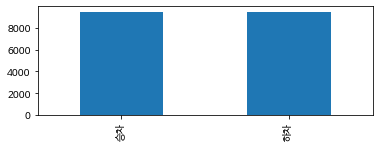

In [9]:
s.plot.bar( figsize=(6, 2) )

In [10]:
# 호선별 승차인원 총합을 데이터프레임으로 정리하라
# 1호선 : x명
# 2호선 : x명

In [12]:
cond= df["호선"] == "1호선"
df[cond]['승차'].sum()

cond= df["호선"] == "2호선"
df[cond]['승차'].sum()

43980200

In [13]:
df['호선'].nunique()

25

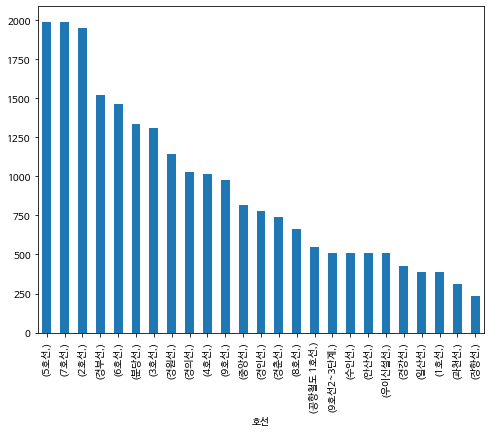

In [14]:
a = df[['호선']].value_counts()
a.plot.bar(figsize=(8,6))

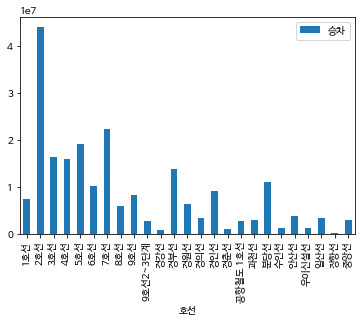

In [19]:
how = {
    '승차': sum
}
s = df.groupby('호선').agg(how)
s.plot.bar()

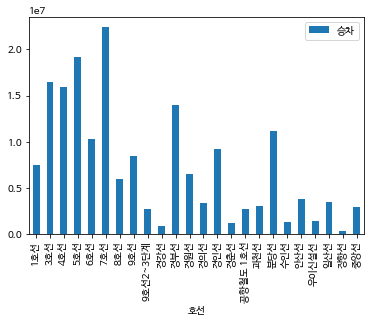

In [22]:
s.drop('2호선').plot.bar()

In [23]:
# 로그를 취하면 어떤가요

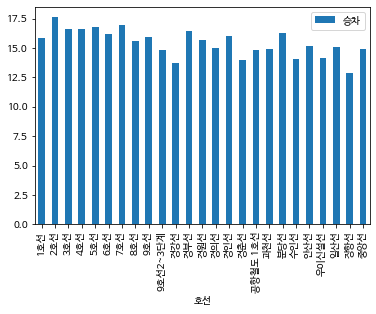

In [28]:
import numpy as np
np.log(s).plot.bar()

In [30]:
df[['승차', '하차']].corr()

,승차,하차
승차,1.000000,0.994765
하차,0.994765,1.000000


In [32]:
df.head()

,사용일자,호선,역,승차,하차,등록일자
0,20200611,중앙선,지평,71,49,20200614
1,20200611,중앙선,용문,1796,1841,20200614
2,20200611,중앙선,원덕,307,298,20200614
3,20200611,중앙선,양평,2475,2462,20200614
4,20200611,중앙선,오빈,293,281,20200614


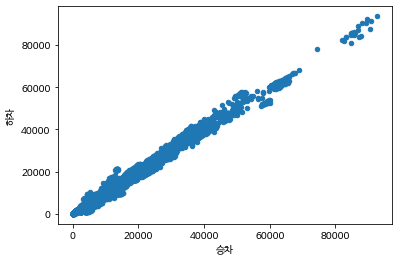

In [31]:
df.plot.scatter(   x='승차', y='하차'   )

In [33]:
s

,승차
호선,
1호선,7520723
2호선,43980200
3호선,16512780
4호선,15972918
5호선,19218856
6호선,10339279
7호선,22370014
8호선,5981684
9호선,8452157
